# Project 1
### Ahmed Sajjad

### Dataset:  Bitcoin Trading network

This is who-trusts-whom network of people who trade using Bitcoin on a platform called Bitcoin OTC. Since Bitcoin users are anonymous, there is a need to maintain a record of users' reputation to prevent transactions with fraudulent and risky users. Members of Bitcoin OTC rate other members in a scale of -10 (total distrust) to +10 (total trust) in steps of 1. This is the first explicit weighted signed directed network available for research.

The dataset is obtained from https://snap.stanford.edu/data/soc-sign-bitcoinotc.html 

Since the dataset represents a bitcoin trading network, most of the trading transactions occur between parties that have some trust between them.

##### Project:

For the purpose of this project, we will analyze the network, centrality and other characteristics.

Nodes: 5,881

Edges:  35,592

Categorical Variables: Weight is our categorical variable which is numeric and range from -10 to 10. 
                       We will split the Positive values as one Category and Negative values as another.

Project presentation can be found at: <br>
https://youtu.be/Dz_UHZDHQ-s

##### Loading: 
Data is in csv format and will be loaded via python. 
It has the following four columns 

SOURCE - The user who is doing the rating.

TARGET - The user who is being rated

RATING - The rating given to the user

TIME -   What time the rating actually happened.


In [37]:
# Load the packages
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
from tabulate import tabulate

In [38]:
# Read the data into pandas data frame
bitcoin_df = pd.read_csv('C:\\DOWNLOAD\\00_SAJJAD\\15 - MS_DATA_SCIENCE\\DATA_620\\Week05\\soc-sign-bitcoinotc.csv',
                      header=None, names=['Source','Target','Rating','Time'])

# Drop the time column because it is not required
bitcoin_df = bitcoin_df.drop(columns = ['Time'])


In [39]:
# Quick look at the data
bitcoin_df.head(10)

,Source,Target,Rating
0,6,2,4
1,6,5,2
2,1,15,1
3,4,3,7
4,13,16,8
5,13,10,8
6,7,5,1
7,2,21,5
8,2,20,5
9,21,2,5


In [40]:
bitcoin_df.tail(10)

,Source,Target,Rating
35582,4608,2045,2
35583,2045,4608,2
35584,13,4608,2
35585,1953,5655,-10
35586,1810,4499,2
35587,4499,1810,1
35588,2731,3901,5
35589,2731,4897,5
35590,13,1128,1
35591,1128,13,2


In [41]:
bitcoin_df.describe()

,Source,Target,Rating
count,35592.000000,35592.000000,35592.000000
mean,2353.847269,2417.478254,1.012025
std,1605.771178,1658.232170,3.562094
min,1.000000,1.000000,-10.000000
25%,988.000000,978.000000,1.000000
50%,2125.000000,2178.000000,1.000000
75%,3722.000000,3804.000000,2.000000
max,6000.000000,6005.000000,10.000000


### Analysis:

In [42]:
bitcoin_network = nx.from_pandas_edgelist(bitcoin_df, source ='Source', target ='Target', edge_attr = 'Rating')
bitcoin_network.number_of_edges()

21492

In [43]:
bitcoin_network.number_of_nodes()

5881

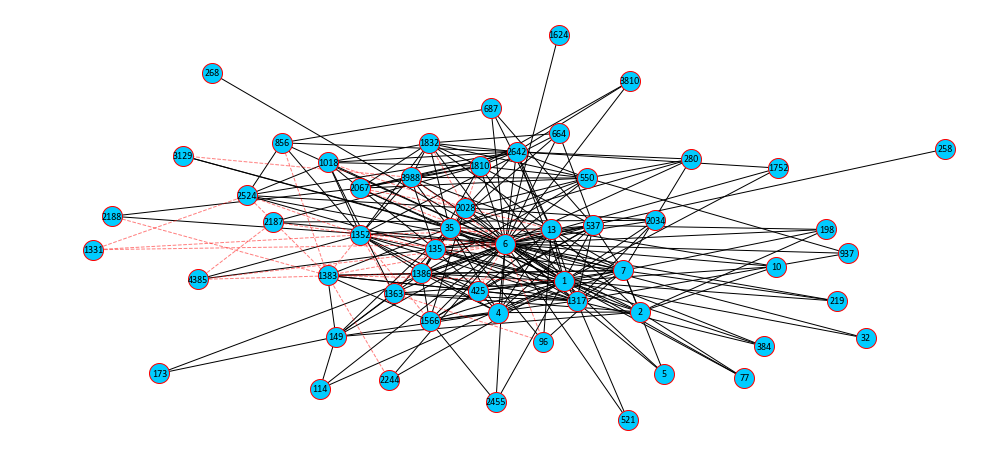

In [44]:
# Since drawing the whole network takes a long time, here we'd just create the subgraph for user_6
user6 = bitcoin_network.subgraph([6, 2,  5,  10,  4,  32,  7,  35,  114,  77,  173,  258,  268,  
                                  219,  198,  1,  664,  937,  384,  521,  280,  687,  1386,  537,  
                                  1317,  1566,  149,  2034,  2455,  1383,  425,  1810,  2028,  
                                  1363,  1018,  1832,  1624,  550,  1331,  2642,  856,  2188,  
                                  2187,  1752,3810,3129,2244,135,13, 2067,61318,4385,2524,3988,1352,96])

epos=[(u,v) for (u,v,d) in user6.edges(data=True) if d['Rating'] >=0]
eneg=[(u,v) for (u,v,d) in user6.edges(data=True) if d['Rating'] < 0]
pos=nx.spring_layout(user6)
plt.figure(figsize=(17,8))

# nodes
nx.draw_networkx_nodes(user6,
                       pos,
                       node_color  = '#01CCFF', 
                       edgecolors  = '#FF0000', 
                       node_size   = 400, 
                       node_shape  = 'o', 
                       with_labels = True)
# edges
nx.draw_networkx_edges(user6, pos, edgelist=epos, width=1)
nx.draw_networkx_edges(user6, 
                       pos, 
                       edgelist=eneg, 
                       width=1, 
                       alpha=0.5, 
                       edge_color='#FF0000', 
                       style='dashed')

# labels
nx.draw_networkx_labels(user6, pos, font_size=10, font_family='calibri')
plt.axis('off')
plt.show()

### Degree Centrality

Degree centrality, which is defined as the number of links incident upon a node (i.e., the number of ties that a node has). 


In [45]:
degree = nx.degree(bitcoin_network)
degree_list = list(degree)
print('The maximum degree in the network is: ' + str(max(degree_list,key=itemgetter(1))[1]))
print('The minimum degree in the network is: ' + str(min(degree_list,key=itemgetter(1))[1]))

The maximum degree in the network is: 795
The minimum degree in the network is: 1


In [46]:
isolate_list = nx.isolates(bitcoin_network)
print('The number of isolates in the network are: '+ str(len(list(isolate_list))))

The number of isolates in the network are: 0


In [47]:
# Degree Centrality List (Top 10)
sorted_degree_list = sorted(degree_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_degree_list[0:10], headers = ['UserID', 'Degree'],tablefmt='grid'))

+----------+----------+
|   UserID |   Degree |
+==========+==========+
|       35 |      795 |
+----------+----------+
|     1810 |      439 |
+----------+----------+
|     2642 |      438 |
+----------+----------+
|     2125 |      436 |
+----------+----------+
|     2028 |      326 |
+----------+----------+
|      905 |      320 |
+----------+----------+
|     4172 |      293 |
+----------+----------+
|        1 |      264 |
+----------+----------+
|        7 |      239 |
+----------+----------+
|     3129 |      217 |
+----------+----------+


###  Closeness Centrality:

Closeness Centrality (or closeness) of a node is the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes.


In [48]:
# Closeness Centrality List (Top 10)
closeness = nx.closeness_centrality(bitcoin_network)
sorted_closeness = sorted(closeness.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_closeness[0:10], headers = ['UserID', 'Closeness'],tablefmt='grid'))

+----------+-------------+
|   UserID |   Closeness |
+==========+=============+
|      905 |    0.436024 |
+----------+-------------+
|        1 |    0.433031 |
+----------+-------------+
|       35 |    0.427479 |
+----------+-------------+
|     2388 |    0.418964 |
+----------+-------------+
|     1810 |    0.410954 |
+----------+-------------+
|     2642 |    0.410465 |
+----------+-------------+
|       13 |    0.410092 |
+----------+-------------+
|     2296 |    0.407642 |
+----------+-------------+
|     2028 |    0.407302 |
+----------+-------------+
|     2125 |    0.406963 |
+----------+-------------+


The closeness points that appear in centrality are 1,13,35,905. We will see that User 905 and User 2125 will be of interest in negative weight sub-network.

 ### Betweenness Centrality:
 
Betweenness is a centrality measure of a vertex within a graph. Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.


In [49]:
# Betweenness Centrality List (Top 10)
betweenness = nx.betweenness_centrality(bitcoin_network)
sorted_betweenness = sorted(betweenness.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_betweenness[0:10], headers = ['UserID', 'Betweenness'],tablefmt='grid'))

+----------+---------------+
|   UserID |   Betweenness |
+==========+===============+
|       35 |     0.193143  |
+----------+---------------+
|     2125 |     0.0777387 |
+----------+---------------+
|     2642 |     0.0647239 |
+----------+---------------+
|     1810 |     0.061622  |
+----------+---------------+
|        1 |     0.0528104 |
+----------+---------------+
|      905 |     0.0525848 |
+----------+---------------+
|     3129 |     0.0519641 |
+----------+---------------+
|     4172 |     0.0496612 |
+----------+---------------+
|     2028 |     0.0444701 |
+----------+---------------+
|        7 |     0.039281  |
+----------+---------------+


### Eigenvector Centrality:

Eigenvector Centrality is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

In [50]:
# Eignevector Centrality List (Top 10)
eigenvector = nx.eigenvector_centrality(bitcoin_network)
sorted_eigenvector = sorted(eigenvector.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_eigenvector[0:10], headers = ['UserID', 'Eigen Vector'],tablefmt='grid'))

+----------+----------------+
|   UserID |   Eigen Vector |
+==========+================+
|      905 |       0.188653 |
+----------+----------------+
|     1810 |       0.182641 |
+----------+----------------+
|     2642 |       0.175077 |
+----------+----------------+
|     2028 |       0.154839 |
+----------+----------------+
|     2125 |       0.148704 |
+----------+----------------+
|       35 |       0.146066 |
+----------+----------------+
|        1 |       0.14085  |
+----------+----------------+
|     1334 |       0.135365 |
+----------+----------------+
|     4172 |       0.135335 |
+----------+----------------+
|     2388 |       0.133787 |
+----------+----------------+


### Sub-networks by Trust

We can now analyze the trust score, -10 to most untrustworthy to +10 for most trustworthy. I am interested in analyzing the highly influential network for which I consider Positive with Rating > 5.

###  High Positive Sub-network.

Network with Rating > 5.

In [51]:
bitcoin_positive_df = bitcoin_df.loc[bitcoin_df['Rating'] >= 5]
print(bitcoin_positive_df.head())

   Source  Target  Rating
3       4       3       7
4      13      16       8
5      13      10       8
7       2      21       5
8       2      20       5


In [52]:
bitcoin_positive_network = nx.from_pandas_edgelist(bitcoin_positive_df, 
                                                   source ='Source', target ='Target', edge_attr = 'Rating')
print("Number of Edges in the positive network: "+str(bitcoin_positive_network.number_of_edges()))
print("Number of Node in the positive network: "+str(bitcoin_positive_network.number_of_nodes()))
positive_degree = nx.degree(bitcoin_positive_network)
positive_degree_list = list(positive_degree)

print('The maximum degree in the network is: ' +str(max(positive_degree_list,key=itemgetter(1))[1]))
print('The minimum degree in the newowrk is: ' +str(min(positive_degree_list,key=itemgetter(1))[1]))

sorted_positive_degree_list = sorted(positive_degree_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_positive_degree_list[0:10], headers = ['UserID', 'Degree'],tablefmt='grid'))


positive_eigen = nx.eigenvector_centrality(bitcoin_positive_network)
sorted_positive_eigen = sorted(positive_eigen.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_positive_eigen[0:10], headers = ['UserID', 'Eigen Vector'],tablefmt='grid'))


Number of Edges in the positive network: 2218
Number of Node in the positive network: 1588
The maximum degree in the network is: 77
The minimum degree in the newowrk is: 1
+----------+----------+
|   UserID |   Degree |
+==========+==========+
|        1 |       77 |
+----------+----------+
|     2642 |       71 |
+----------+----------+
|       35 |       57 |
+----------+----------+
|        7 |       50 |
+----------+----------+
|     2028 |       49 |
+----------+----------+
|      257 |       48 |
+----------+----------+
|     4172 |       48 |
+----------+----------+
|       25 |       43 |
+----------+----------+
|     1018 |       37 |
+----------+----------+
|     1810 |       35 |
+----------+----------+
+----------+----------------+
|   UserID |   Eigen Vector |
+==========+================+
|        1 |       0.388374 |
+----------+----------------+
|        7 |       0.233202 |
+----------+----------------+
|     1386 |       0.227948 |
+----------+----------------+
|     

Users 25, 257 and 1018 now show up on the list of degree centrality. This implies that these users operate in fairly isolated sub-networks, as eigen centrality is a measure of how the nodes in network link to other nodes. Perhaps these users only deal with people they know personally.

We see that Users 1386, 1201 1383, 1317, 1396 and 1565 have fairly small networks with respect to nodes, but farily high eigen vector centrality. This means that they only deal with a few highly connected, highly regarded users. 

### Neutral Sub-network:

In [53]:
bitcoin_neutral_df = bitcoin_df.loc[bitcoin_df['Rating'] == 0]
print(bitcoin_neutral_df.head())

Empty DataFrame
Columns: [Source, Target, Rating]
Index: []


From this we can see that there are no neutral users. Every user has some opinion: either positive or negative.

### High Negative Sub-network:

In [54]:
bitcoin_high_negative_df = bitcoin_df.loc[bitcoin_df['Rating'] < -5]
print(bitcoin_high_negative_df.head())

      Source  Target  Rating
1105     101     315     -10
1422     366     410     -10
1424     432     410     -10
1488     443     410     -10
1621     427     467     -10


In [55]:
bitcoin_high_negative_network = nx.from_pandas_edgelist(bitcoin_high_negative_df, 
                                        source ='Source', target ='Target', edge_attr = 'Rating')
print("Number of Edges in the negative network(< -5 ): " + str(bitcoin_high_negative_network.number_of_edges()))
print("Number of Node in the negative network (< -5) : " + str(bitcoin_high_negative_network.number_of_nodes()))

Number of Edges in the negative network(< -5 ): 2278
Number of Node in the negative network (< -5) : 1181


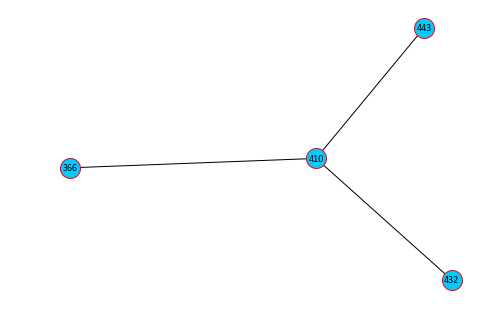

In [56]:
user410 = nx.ego_graph(bitcoin_high_negative_network, 410)
nx.draw(user410, 
        node_color  = '#01CCFF', 
        edgecolors  = '#FF0000', 
        node_size   = 400, 
        node_shape  = 'o', 
        font_size   = 10,
        font_family = 'calibri',
        with_labels = True)

### Negative Sub-network:

In [57]:
bitcoin_negative_df = bitcoin_df.loc[bitcoin_df['Rating'] < 0]
print(bitcoin_negative_df.head())

     Source  Target  Rating
596     104     179      -1
597     200     179      -1
598     149     179      -1
632       7     179      -1
646     135     179      -1


In [58]:
bitcoin_negative_network = nx.from_pandas_edgelist(bitcoin_negative_df, 
                                                   source ='Source', target ='Target', edge_attr = 'Rating')
print("Number of Edges in the negative network(< 0 ): "+ str(bitcoin_negative_network.number_of_edges()))
print("Number of Node in the negative network (< 0): "+ str(bitcoin_negative_network.number_of_nodes()))

Number of Edges in the negative network(< 0 ): 3259
Number of Node in the negative network (< 0): 1606


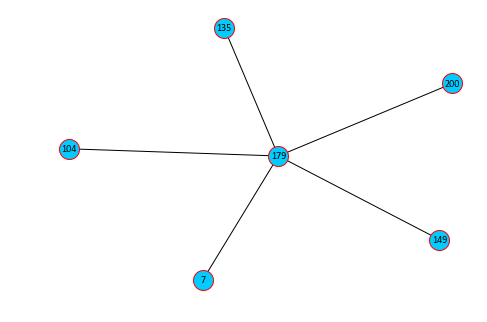

In [59]:
user179 = nx.ego_graph(bitcoin_negative_network, 179)
nx.draw(user179, 
        node_color  = '#01CCFF', 
        edgecolors  = '#FF0000', 
        node_size   = 400, 
        node_shape  = 'o', 
        font_size   = 10,
        font_family = 'calibri',
        with_labels = True)

In [60]:
negative_degree = nx.degree(bitcoin_negative_network)
negative_degree_list = list(negative_degree)

print('The maximum degree in the network is: ' + str(max(negative_degree_list,key=itemgetter(1))[1]))
print('The minimum degree in the newowrk is: ' + str(min(negative_degree_list,key=itemgetter(1))[1]))

sorted_neg_deg_list = sorted(negative_degree_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_neg_deg_list[0:10], headers = ['UserID', 'Degree'],tablefmt='grid'))

neg_eigen = nx.eigenvector_centrality(bitcoin_negative_network)
sorted_neg_eigen = sorted(neg_eigen.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_neg_eigen[0:10], headers = ['UserID', 'Eigen Vector'],tablefmt='grid'))

The maximum degree in the network is: 227
The minimum degree in the newowrk is: 1
+----------+----------+
|   UserID |   Degree |
+==========+==========+
|     2125 |      227 |
+----------+----------+
|     1810 |      167 |
+----------+----------+
|     2266 |       98 |
+----------+----------+
|     4172 |       82 |
+----------+----------+
|     2067 |       80 |
+----------+----------+
|     3744 |       80 |
+----------+----------+
|      905 |       75 |
+----------+----------+
|     2877 |       65 |
+----------+----------+
|     2028 |       64 |
+----------+----------+
|     2045 |       60 |
+----------+----------+
+----------+----------------+
|   UserID |   Eigen Vector |
+==========+================+
|     1810 |       0.251258 |
+----------+----------------+
|     2125 |       0.2112   |
+----------+----------------+
|     3789 |       0.160404 |
+----------+----------------+
|     3790 |       0.160404 |
+----------+----------------+
|     3792 |       0.160404 |
+-----

We notice here that Users 905 and 2125 are in both degree and eigenvector centrality. That means they are connected to a lot of users that don't trust who are also connected to a lot of users that don't trust each other.

In the above list, there are 4 users 3789, 3790 3791 and 3792 that have the same eigenvector centrality of 0.160404. And 3 users 3793, 3794 and 3795 have the same eigenvector centrality 0.155724

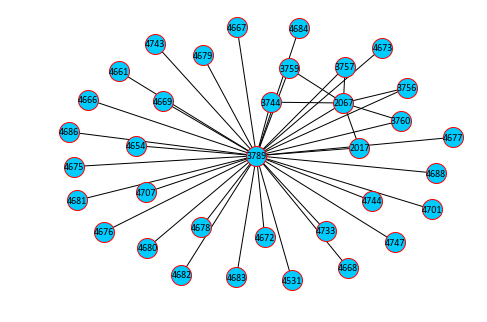

In [61]:
user3789 = nx.ego_graph(bitcoin_negative_network, 3789)
nx.draw(user3789, 
        node_color  = '#01CCFF', 
        edgecolors  = '#FF0000', 
        node_size   = 400, 
        node_shape  = 'o', 
        font_size   = 10,
        font_family = 'calibri',
        with_labels = True)

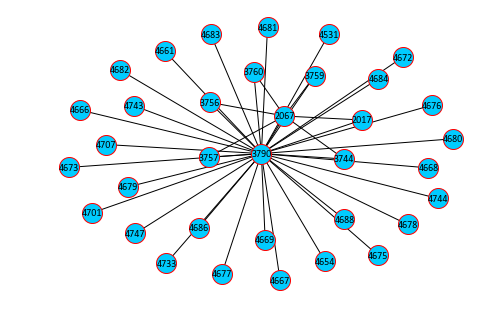

In [62]:
user3790 = nx.ego_graph(bitcoin_negative_network, 3790)
nx.draw(user3790, 
        node_color  = '#01CCFF', 
        edgecolors  = '#FF0000', 
        node_size   = 400, 
        node_shape  = 'o', 
        font_size   = 10,
        font_family = 'calibri',
        with_labels = True)

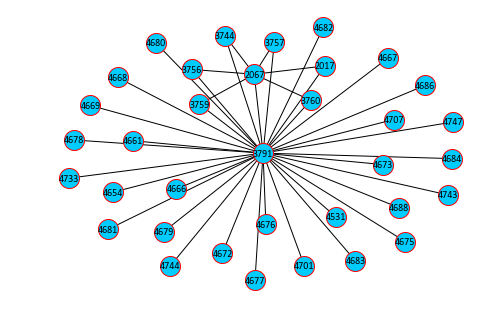

In [63]:
user3791 = nx.ego_graph(bitcoin_negative_network, 3791)
nx.draw(user3791, 
        node_color  = '#01CCFF', 
        edgecolors  = '#FF0000', 
        node_size   = 400, 
        node_shape  = 'o', 
        font_size   = 10,
        font_family = 'calibri',
        with_labels = True)

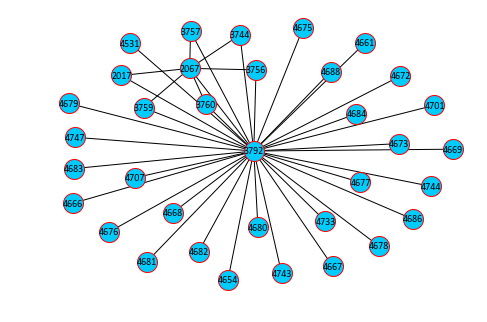

In [64]:
user3792 = nx.ego_graph(bitcoin_negative_network, 3792)
nx.draw(user3792, 
        node_color  = '#01CCFF', 
        edgecolors  = '#FF0000', 
        node_size   = 400, 
        node_shape  = 'o', 
        font_size   = 10,
        font_family = 'calibri',
        with_labels = True)

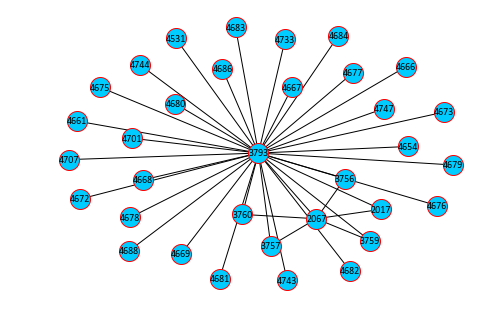

In [65]:
user3793 = nx.ego_graph(bitcoin_negative_network, 3793)
nx.draw(user3793, 
        node_color  = '#01CCFF', 
        edgecolors  = '#FF0000', 
        node_size   = 400, 
        node_shape  = 'o', 
        font_size   = 10,
        font_family = 'calibri',
        with_labels = True)

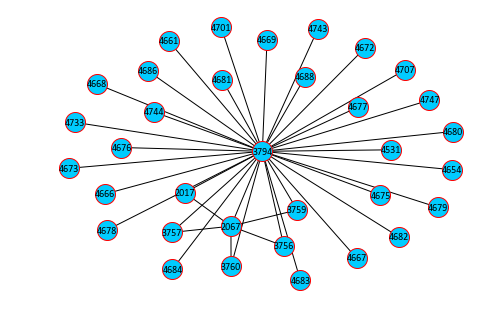

In [66]:
user3794 = nx.ego_graph(bitcoin_negative_network, 3794)
nx.draw(user3794, 
        node_color  = '#01CCFF', 
        edgecolors  = '#FF0000', 
        node_size   = 400, 
        node_shape  = 'o', 
        font_size   = 10,
        font_family = 'calibri',
        with_labels = True)

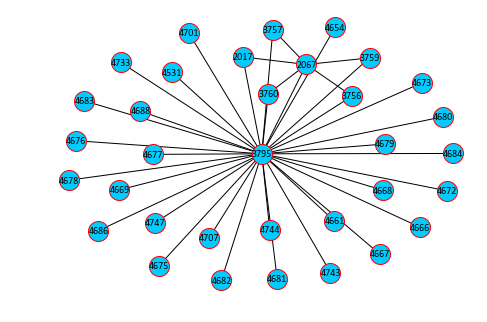

In [67]:
user3795 = nx.ego_graph(bitcoin_negative_network, 3795)
nx.draw(user3795, 
        node_color  = '#01CCFF', 
        edgecolors  = '#FF0000', 
        node_size   = 400, 
        node_shape  = 'o', 
        font_size   = 10,
        font_family = 'calibri',
        with_labels = True)

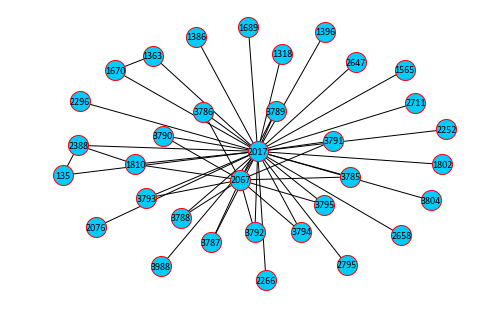

In [68]:
user2017 = nx.ego_graph(bitcoin_negative_network, 2017)
nx.draw(user2017, 
        node_color  = '#01CCFF', 
        edgecolors  = '#FF0000', 
        node_size   = 400, 
        node_shape  = 'o', 
        font_size   = 10,
        font_family = 'calibri',
        with_labels = True)

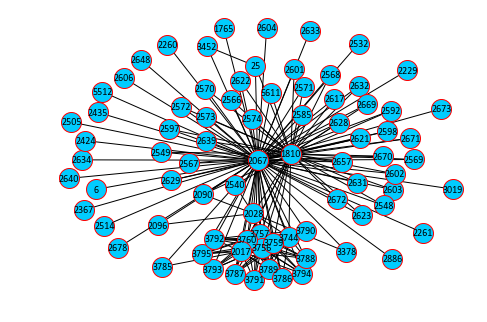

In [69]:
user2067 = nx.ego_graph(bitcoin_negative_network, 2067)
nx.draw(user2067, 
        node_color  = '#01CCFF', 
        edgecolors  = '#FF0000', 
        node_size   = 400, 
        node_shape  = 'o', 
        font_size   = 10,
        font_family = 'calibri',
        with_labels = True)

Edges in user2's network: [(2067, 2017), (2067, 3744), (2067, 3756), (2067, 3757), (2067, 3759), (2067, 3760), (2067, 3792), (3744, 2017), (3744, 3756), (3744, 3757), (3744, 3759), (3744, 3760), (3744, 3792), (3756, 2017), (3756, 3757), (3756, 3759), (3756, 3760), (3756, 3792), (3757, 2017), (3757, 3759), (3757, 3760), (3757, 3792), (3759, 2017), (3759, 3760), (3759, 3792), (3760, 2017), (3760, 3792), (3792, 2017), (3792, 4688), (3792, 4701), (3792, 4707), (3792, 4733), (4531, 3792), (4531, 4661), (4531, 4666), (4531, 4667), (4531, 4673), (4531, 4675), (4531, 4678), (4531, 4683), (4531, 4707), (4531, 4733), (4654, 3792), (4654, 4531), (4654, 4661), (4654, 4666), (4654, 4667), (4654, 4668), (4654, 4673), (4654, 4675), (4654, 4676), (4654, 4683), (4654, 4707), (4654, 4733), (4661, 3792), (4661, 4666), (4661, 4667), (4661, 4673), (4661, 4675), (4661, 4683), (4661, 4707), (4661, 4733), (4666, 3792), (4666, 4667), (4666, 4673), (4666, 4675), (4666, 4683), (4666, 4707), (4666, 4733), (4667, 

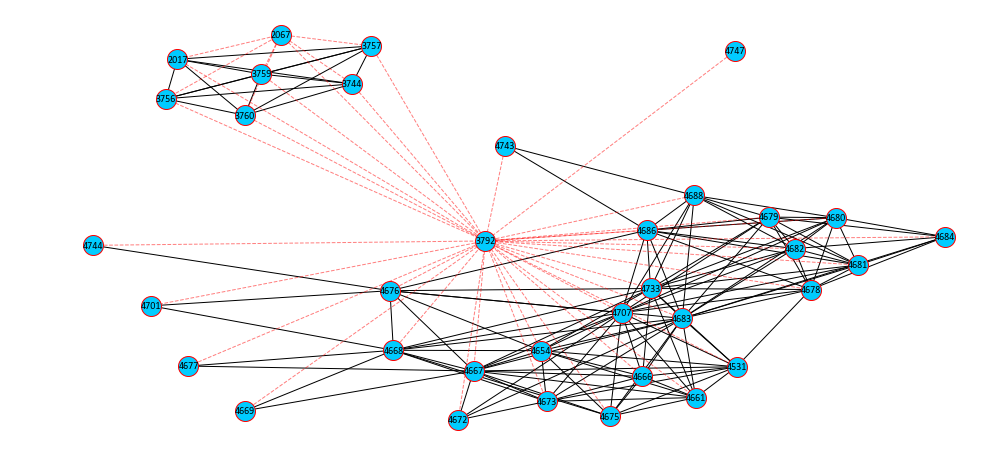

In [70]:
user3792 = nx.ego_graph(bitcoin_network,3792)
print("Edges in user2's network: " + str(sorted(user3792.edges())))

epos=[(u,v) for (u,v,d) in user3792.edges(data=True) if d['Rating'] >=0]
eneg=[(u,v) for (u,v,d) in user3792.edges(data=True) if d['Rating'] < 0]
pos=nx.spring_layout(user3792)

plt.figure(figsize=(17,8))
nx.draw_networkx_nodes(user3792,
                       pos,
                       node_color  = '#01CCFF', 
                       edgecolors  = '#FF0000', 
                       node_size   = 400, 
                       node_shape  = 'o', 
                       with_labels = True)

# edges
nx.draw_networkx_edges(user3792, pos, edgelist=epos, width=1)
nx.draw_networkx_edges(user3792, pos, edgelist=eneg, width=1,
                       alpha=0.5,edge_color='#FF0000',style='dashed')

# labels
nx.draw_networkx_labels(user3792, pos, font_size=10, font_family='calibri')

plt.axis('off')
plt.show()

From the above graph we notice that that user 3792 are connected to 2 subgraphs and most of the interactions are negative. The smaller network consists of nodes 2067, 2017, 3760, 3759, 3757, 3744, 3756 and other network consisting of 4654, 4683, 4686, 4676 and many others. 